# A GNN algorithm for DNA sequencing 
## Import the important librairies

In [1]:
# import the librairie for graphical modeling
import networkx as nx
# matplotlib for visualization
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import math
#pandas to work with data frames
import pandas as pd
import scipy.sparse


Inslall stellargraph (to run on google colab)

In [2]:
pip install stellargraph

     |████████████████████████████████| 440kB 18.8MB/s 


In [3]:
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import GraphSAGELinkGenerator
from stellargraph.layer import GraphSAGE, HinSAGE, link_classification
from stellargraph import StellarGraph

from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection

from stellargraph import globalvar
from stellargraph import datasets
from IPython.display import display, HTML
%matplotlib inline

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from __future__ import print_function
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras import regularizers

**Human Genome**

In [5]:
# we copied a dna sequence of the human genome
dna_sequence = "CTACTCGGGAGGCTGAGGCAGGAGAATCACTTGAACCAGGGAGTCAGAGGTTGCAGTGAGCCAAGATCGCACCACTGCACTCCAGCCTGGCAACACAGCGAGAGTCTGTCTCCAAAAAAAAAAAAAAAGGCCCAAGAGCATTTCAAACTGTTTGTTGAGAGGTAATCTTATACATTCAGTTTCTTTTGGCTTACCTGAAGAGGTGCTTGGCTATGGTTAACAAACTACGTAAGCTGGTGAAAAAACCTGTCACCTTATCCAGAGAAGCTTCTTCTTTTAGAAAATCAAGCAAAACAACTAAGCCAAGACATGTTAAAAAAAAAGTTTGAAAAGAAAGCTGTAAGGAAATACAAGGGGAGGGATTGTTAGATATGAGTTCTAAATTTCTTTTCAAAAAATCGATATGTCAGTATGTTCAATTCTTTGCCTTCTACTTTTAAACTTCCTCATAAAGCAACCTTTTTCAATTACCTGCTCCACCCTGACTCATTCTGATCACCAAAGGGGCTGATAGAAAAATAAAGAGATTTGGCCAGGTACGGTGGCTCACTCCTGTAATCCCAGCACTTTGGGAGGCCGAGGCTGGCGGATCACCTGAGGTCGGGAGTTCGAGACCAGCCTGACCAACATGGAGAACCCCTGTCTCTACTAAAATTACAAAATTAGCCAGGCATGGTGGCACATGTCTGTAATCCCAGCTACTTGGGAGGCTGAGGCAGGAGGATCATTTGAACCAGGGAGGCAGAGGTTAAGTGGATATTCAGACCTCCTTGAGGCCTTCGTTGGAAACGGGATTTCTTCATATTCTGCTAGACAGAAGAATTCTCAGTAACTTCCTTGTGTTGTGTGTATTCAACTCAAAGAGTTCAACGATCCTTTATACAGAGCAGACTTGAAACACTCTTTTTGTGGAATTTGCAAATGGAGATCTCAGCCGCTTTGTGGTCAGTAGTAGAAAAGGAAATATCTTCGTATAAAAACTAGACAGAATGATTCTCAGATACCATGACAAAGATATTATTAGCCAATTTTTAGAGAGAAGGAAAGTAGTTAACCAAAGAAGTTAAGGCATATATCCTGGGTCACACAGCTATCAGACAGGCAGAGCCAAGGTGCACACCTGGATCTTTTTGACTCCAGAGCTGAGCTATCATCTACTACACTGTGCTCTGAGAGACAGACCATATTACAATTCCTGCAAGATCAAAACGCATGGCAGAAGAGATGCTAATGAGATTGCGCTGATCAGTACATGATTGGAAATTAGGCAGCATATCAGAATATCAAAATGAAAATTAGAAAATATTTGACCTGAATATTAATCTCCATCTGCCTGTCTATTAGAAGGATATTTTTCACTGGATTCAGGGCCCACCAGGATAATCCAGGATGATCTCCTTCCCTCAAGATCCTTGACTTAATCACATCTGCAAAGGCCCTTTTTCCAAATAAGTTAACATTTGTAGGTTCTGAGAATTGGGATCAGGCACATTTTTGAGGATCTGCACCAGTGCCCCCCACCACCACCTGCTATTCCAGGCCCCCATCCTAACACCTCCATTGCTCACACCAACAGAATTCCATTAGCAATGTGGAGAATCAGTTGAGTTTAATTATTCAAATCCAGGCATCAGGGGCTTTTAAATGAACCCATTCTTTCTTCCAGAATTCTAAAGTCACCAATATTTTAAAAATAAAAGGTCTCAGATCTCCTGGTCTCTCTTGTCAGTGGACACACTGGCATCAGCCCTGTGGGGGAGTAGGAACCGAGTCCCAAGGCCACAACCTCGCTGGGTGTCCCTGGGCAAGTCTCCTCCCCACTTTGAGCCTTAGTTTTCTGTCTGCAAAATGGGTTAAGTGTTTTCCTGGCCTCCCTCCAGGAGCTGCTGTGTGCGGGTGAAATGCAAAGACCCCTGTGAAAGCGTTGCCCACTGTGCGGCGTGCGGCACCCAGCGCGGAACCGTCCTAATGGGACGCTGAGACCCAGAGGGCGCCCAGGGTGGAAAATCCAAGAGTATGGCCTTGGCCCCTGGTGAGGGCCTTCTTGCTGTGTCATAACATGGCAGAGGGCATCTCATGTCAAGAGGGCAAGAGCAAGAGAGCCAGAGAGATAGCAAACCTGCTTCCATGGTAGCAACATTAATCCAGCCGTCATAAATTCGTTAATCCATTCATGGGGGCAGAGGGATTAGGTTTCCAACACAACTTTTGGAGGACACCTTCAAACCATAACAATGGCAGAGTCCTTGATATTAGAATATGCAGGGTTTGCAAAGCTGTAAACAAACTGGCATGTACTGTTTAGCATAAATAACTCATGTACTATTTAGAGTAAATTATTACATTTACAGAGGAAAAATTAAAATATTTATCAAAATTTTAAGGTATATATCCTTTGACCTAGAAATTCTAGTGGTAGGAATAAATCCTACACAGATAACTATACAAGTTCACTAATATAAATGTGTATAAGGATACATATACACACATGCACACACACAAACTGTTATAGTTCAATAGTGGTTAATATTTTGGGTAATATTTTGAGTAATTTTCTGCATTTCTTATATTGCTATCGTTTCATTTTATTTCCAGCAAAATGTATTGCATTAGAATGTGGGAGAATTCAACTGAGTTGCTGATTGGATTTTCAAACTCATCGCAGAAATCACACCTTTGAAAGCCAAAGCTTTCATTTGTAAAACCTAGGCTTTTTAAGAGAATAAAAGTATTCTTGAAAATCAAAAGGAAGGTACCAGTTGTGCAACAAATGAAATGTTTGTCCATAATTAGAGTAATTGTAACTTGATTTTAAACAGAGGTTTGATTGCATGGTGAGTGTCATAATGCCAAATGATTTTTCCATTGATTCAGGGCCCAGTGTATTCTTAAGTTGATGTTTGATCTCAGCATGTTTAACCTGGCCCAGAATATATCTGGCACCCTTTTGTGTGTGTGTTGTAAATGACTGTTCTTCTGTGTTACAGCTTCATACAAAATTTATTGCTTAGATTGGGGCTTCAAGTGTTGCCTTCAGGATACTGGATATTTATGATGAGTGAGCTAAAGCTTGTTTAGTGTCTATTTTGGGGCTATGGTAGGCAGATCTCTTCCCACTGGTTAGTGTTATTACAGCTGTTGTGATGATCTCATTGAATGTAGCTAAAATGGACTTTTAGTCAGCAACACTTTTAGAAGATTTAGTGTAATGAGTGAGCTTTTCGGGCTTTTGTTTTGTTTCGTTTTTTTGAATCTAGACAGAAGCCTTCTCAGAAACTTCACTGTGATGATTGCTTTCAACTCACAGAGTTGAATATTCCTTTTGATAGAGCAGTTTTGAAAGTCTCTTTTTCTAGCATCTGCAAATGGATAGGTGGAACTCTGTGAAGATTTCTTTGGAAACGGGAATATCTTCACGTAAAAAGTAAACAGAAGCATTCTGAGAAACTCCTTTGTGAGGCTTGTGTTCATCTCCCAGAGTATAACATTGCTTTTCATAGTAGACAGACTTGTTGAGTTAGATTTCACTGGGTACCATTTGCTTATAATTTTTAATCACTATTTTCCAAAGTATCTTTCTGAAATAAGCAAAGTAGTCTGCCAAGTTCCTAGCTCAAGTTAGGAGAGCAGAATATAGGTTAAAAAAATAAATTAAGTTGTGTTTATTTTGTAGTATCTAATTATATTGTATTAGCACAAGTTAGGAATACAGGAAAAGTGCTTACCTTAGAGATGATAAGACAATATATGATAACACTCCAATTTGAATTCACAACAAGTTAACTTCAATAGCAATACAAACAATCTGCTTCTATTCAGCTCCATCTCTACTTCCTTTTAAAGACTGATATTGTAAAATTATATACTTATATACTGTGTATCCAAAAACAGAAACTGATGATGTTTTATGTATTAATCTCTTAAATAATGTAGAAAACAAAATGTTGATTCACAAATGAAAGTTATAGTAATACTAGGTTTTAAACTAATGATAGTTTTTACAAGAACTCATCATTTTTTAAGGCTGCAGAGTATTCCATGGTGTATATGTGCCACATTTTCTTTTGTGTGTGTGTTTTTTTTTTTGTTTTGTTTAAGTTTTTCTTTTATTATTATACTTTAAGTTTTAGGGTACATGTGCACATTGTGCAGATTAGTTACATACGTATACATGTGCCATGCTGGTGCGCTGCACCCACTAACTCGTCATCTAGCATTAGGTATATCTCCCAATGCTATCCCTCCCCCCACACCTGCTGCAGCTTCATTTGCTTTCACACAAACCAGTACGTCGCTTTCACCTGTGACACTAGAACTTCTCCATTACTCTGGGAAATTGAATGTGTGTTGTAAAACTAGGAAAAATCCTGAGGTATATGGCAATGGAACTTCATCCATAGGCAGTGGAAGGATGGTTCTAGATTCAGCTCTAGTCTTTAGGTGCCCTGTGGCAGTGTGCAGAGGCTGTGGGTTTCTGGCCAGAGCGTGGAAGTCAGAAAGCCAAGGCAGGTAGATCACTTGAGGTCAGGAGTTCGAAACCAGCTTGGCCAACATACTGAAACCCCGTCCTTACTAAAAGTACAAAAATTAGCCAATGTGGTGATGCATGCCTGTAATCCCACCTACTCGGGACACTGAGGCAGGAGAATCGCTTGAACCAGGGTGGCGGATGTTGCAATGAGCCGAGATCATGCCACTGCACTCCAGCCTGGGTGACACAGCAAGACTCTGTCTCAAAAAAAAAAAAAAAGACCAGGAGTATAAATAAGCCCCTGCCTTCTTGACTGAAATTTTTACTGAGATAATTATAGAATAGATCTGCATACAGTTAGAAGAAATAATACATAGAGATCCCATATGCACTTTATTTATTTATTTATTTATTTATTTATTTATTTATTTAATGGGTTTTTTTTTTTTTTTTTTTTTTTTTTTTGAGACAGAGTCTCACTCTGTCACCCAGGCTGGAGTGCAGTGGCGGGATCTCGGCTCACTGCAGCAAATAACATATTCACCTGACAGTCAGGGCTTGGACATCTTTGAGGAACAATTTTTCAGCCTATTACATTTGGCAATCTGTGTAAAAATCACACAAGAATCTATTTATGTGAAGATTTTGGATTTTAAATTAAGCAGGAAGGGAGAAATTGTATGAATTGGCCATGGGAGTGAGCTAACAGAGAAGACTGTATTTGTCAGGTTCTCCACAGAAACAGAAACAATAGGATGGAGACAGAAGAATATGGGAGAGATATTGGTCCATAAATGTCTTTGCTTGGAATGTCTTTGCCTGGATGATGCTGACTTTATACAATGAGTTGGGAAATATTCCTTCCTCTTGCATTTTCTGGACAAGATTGTGTGAAGTGACTATTATTTCTTCCTTAAATATTTGATAGAATGCCTCATATTTCTCCCTTTTATATCCAAGTCTCACCTGGGTAGGGTTGCCAGATAAAATAAAGAATTTTCAGTTAAAATTGAATTTTAGATAAACAACTAGGACTGAGTCTTCAATGTCAAGGCAAAAAGTGACTGTTTCCCTAGAAACAAATTCTGTGGGCAGACAAAGAGGAGCCATGGACTAGCTCCTCAATCACATCGCTGTCTAATGAACAAAAGAGAAGAGACTACTCATACATATAAAGCAAGTATGTGGGGGGAAGTAAAGGAGCACAGATCCGTTTGTCTATGTATCTTTCTATCATCTATCCACCTGTCTATTAGATTGTGTTAGTTTCCTATGAGTAAGGGTCCATATTAGAAAATGTACTCTAGACAATATAAATCACTATCATAAAGAATTCATGAGAATGATAACATGGCACCAGAACTGTGACAAAACACCAACAAAACAAAACAACAACAACAACAACAAAAAAAACCTACTTATCCCCAAATTTTTCTGATTTATGATAGTTATTATGAGTTTCATTTTTTAAAAATTCCCCTTCTGCTATGGCATGAATATTTGTGTCTCCCCAAAATTCATATTTTGAAGATGGTGAATGGGAGTGCAGAAGCTGCAGCTGAAGGTGCAGCAGGTGGGGAGGATCAAGGCCTGAGAGCCCTGCTGGTTTTCTCAGCAGGGAGGCTGGTAGCCTGGGGCAAGATCTCCATCTTGCTCCCAGCTGTCCGAATATACATTCAGTGCTGTTGGTAGGAAATAGAAGGAGTGAGACTGGCTTTGCTGGCTACATGGGAGCTGGGTGAGGCCTGTCACTGCCAGCTTTCCCCCACTTCCATGGTGGACATCTGAGTTTGTGTTGGGCAGCAAACATTTGTATCCTACTGAAGTTTTAAGAGAAATGTTTTTTCCTATAAATGTATATATTTCTTATTAAAAATTGTGGTTATAAATATTTCTCTCACAAAATATAATTTCTGGGTGACAAAATAAGATATTTTTCTAAATAGGAAAGATTACTTCATCATTTAAGAGTTGTAAAATTGTATAAATAATTCATAGTCTAACTAAACTAAGGACTTTTTAAAAACTACAGTATTAAAAAGTTCAGTCTTGTCTAACTCAAAGCATTAATCTAATACTTGATTTGGAACGTCCCCTCCTGTCAGCTCAGGAATGACTCAGTGTGAGGGGAAGAGAAGCTGTGAGAAGACATAGGGGAGGACTCTGTTCTGGTTTTTTATACTCCTTTCTTCTCTCCCTATCCCACCCTCAACCTTGCCCTTTCCATTTCTGAATCCTGGGAGATGGCAGGGATCAAAAAAGGAGCTAATTTATAACTCGCTCAGTAAGGTTAAGTAACTTCTCAACAACTCAGAGCTCAGCAAGCTACAAATCCAAGTTTCTATATTAAATCTACCAGGTTCCAAAACATATGTTCTTAACCCCTACATTCTAGTGGCTGGTGGTTAAGCTCTTCTATTAACTTGAAGTCAATTCACTCTGCCTCGGTTTCCTTATCTGTCAAATAGGGGAAATCGTTCACTCTCACCATCTTTAAGTTATTGTGAAGACATGCGGTATTGAGCTTAAAGCAAAGAACAGTGTCAAAAATCTAAACGTTTTTCCTTCAACATCTGCATTTGCTTATTAAAAAACAAACCCATCCCACACCCCCAATCTCTCAAACAAGTTAAGTTTGCATGAAATGTTTTTCATTTGTCCTGATATTCAATCTGAAATTTTTTGTGTATCTGAGAGTTTTAGTCTCTTTCATTTCTACATGTCCTTACATATAGGACTTAAGATAGGAGTGGTCTTACAGAATTTTGAGAAAAACGCTAGCTGGGAACACTGCAGTGGGCTTCAAAGCACCAGGACTCATTCCCAGCCCCTGGTGGCTCCTGGGGAAGGGTGAGTTAAACAGGTGAGGAGTGGCCCACTCTTGTCACGGACCTCTGGAATCTTAGCTGCAGAAGACCTCATGACCCCCACAGACATTTAAATTGGCAGAGAGAACTGCCTGGAGAAATGGCAGGGACAGGACTCCACCCTGTGTGGAGCCCAAAGGGTTTGGCACAGGAATGGCTACAGTTTAATACCCAGGAACCTGACTACCTTGAGGTGGTCTTGGGGTCAGGCCTGCAGCTCCAGCCTTGGGGGTGTTCTGCCTGGGCAGCCATCAGGGGAGACTACTTGAGGAGAAGGAGGCGGTGCCTTGGGGTTAAGAAGATGGTGCTCCTCCCTCAGGCTAATGGGAAGGGGAGTTCTTAAATGTCCTGGAGTATCCAGGTCTGGAGAGAAGAGGACATGACCTGAAGCTCAGCAGGTGGTGGTGAGTTTAGAAAACTATAACACAAATTTAGGCACAGCATATACATCTCAGGGAGCTAAGACAGAAAATGAAGGAACTGCAATTCTTCTTGTCTTTCCACTCATGTCACTAAGAGGCACTTATTTACAGTGGAGAAGAGATATAAATGCTCACTTCTAGCAAGTGTGATTTTCAGAGTGATGCCCACAACTGAAACAGAAAGATCCCCGGGCCGGAAGTGGTGGCTGATGCCTGTAATCCCAGCACTTTGGGAGGCTGGTCTCACTCTGTCACCCAAGCTGGAGTGCAGAGGCCTGATCATGACTCACTGCAGTCTCAGCCTCCCTGGGCTCAAGTGATCCTCCCACCTCAGCCTCCCAAGTAGCTGGGACTACAGGAACATGCCACCACACTAGGCTAATTCGCGTATTTTTCTGTAGGGATGGTGACTCCCCCTTTGTTTCCAAGGCCTATTGCAAACTCTTGGCCTCAAGCCATCCTCCTGCCTCAGCCTCCCAAAGTGTTGCGATATGCTAAATATGATGAGATGTTTAAGAAGAAAAAGTGCTGGGGAGGGAGGGACATGTTTCTACCGATAAAAGAAGTTACTTAATTTCTCATCCCTTGGGTTTATTACCAGAGTTCTGAGTTTCGTCTCATAATGTAGCAAAATATTCCATGCAAGAAACCACTAGAATGCACCAGCAAAAGGAAGATGCCGAAATAATGAATGAAAAAGCATTTCCATCATGGTCGTCTCAGACAATGAGATTCCTCCAACAAAATGTAACAGGCAGAAAGTCTGTTTCAAACAAATTAAAAAGCTATGTGTTTTTTAAATTCTTCCCAAATCAGATATATACACACCCACAAAAATAGTGTGTGAAGGAAAGCTGTCATACACAAGAAGTTGTATCCTGAATTCTTCAAGGAAACACATATTGAAATAGGAATTAAGAGTCAGCAACAGATTAATAATTTTTTAAAATTGAGTCTTAAAATGCTACATGGCCCAAAGCTATACTATATGTCAGAGTTCAAGTCTGTTAGAAGAGTCCACTTCCTGAGTTTTTCCCAGCTGTGCTGTCTGAGCTCTGAAAGCACTGTGTCCCAGCCGCGACCAACTTTAGTGGACCCAAGTCCCAACCCAAAACCCTCTCACCTCCGTTCCTCGGTCAATGGCTACTTTGCCCAGCCGCACGGCAATGGGGGCCTAGGGAAAAGCAAAAAGTCTTGGTTGAGGAGGGCATCAAGGCTGATAGTTGCAGGTCTGAGGTGCTATCATGACCTTTTCAAGTGTTTTCTTGATATGAAACAAAGCTGCCACTGCCTGAGTAGTTTGTATAAAAACATCAGATTTCTAGGTGAAGCAGAAAAGAAAGGGAGTGTGGAGCTTGATTCCTTCCCCAGGGGTCTCTATGATGCCATCCTTGAATGAATGATCAAGGCGTGTCCCCCACTGCCTCTGAAGGTACTTCTCGTGGCTGCCACCAGCTGCCTTAACAATTTGGAAGGAAAGGCAGGCCCAAAAGTCATGATTATTATATCCTTATTCTATACTAATTAGCTCATTTCCTAATAGCAGTAGGTGCCAGTGTATCAAAGATATAAGATTGTTCTGAAAACTGCTTAGATGTAACGGAGACTCAGGACACTTTTCTAAATTTTCATTTATTCAAATATTATTTATCTATAGAACTATGGTTTTTAAAAATAACATTTTTAGATCTGTACTATATAACCCTGGTAGAACCAGTATCACACCAAATGTGTTTGATATACTATGGTTTTTTCTATACATACATATCTAGGATAAAGTTTAATTTATGAATTAATCATAGTAAAAGATTCATAACAGTAATGGATAATAAAACAGGAAAATTTTAACAACATGCGAGTATCACTACTTTTGCTCTTTGGGACCATTAAGTAAAATAAGGGTGACTTGAACACAAGGTCTGCAATACCACAACAGTTGATCTAATATCCCATATGGCTACTAGGTGACTAGCAGGCTGGTAGTGGACAGATTTTGCTTAGTTTCTATGTCTTTATCAGTAATTTCTCCCTAAACTCTAACCATAAGTGTAAATCTTCCACAATACATTTAAGCATTTTGGCTATATTATAAATTTTATCTTGGGCTAAGCGCAGTAGCTCACACCTGTAAGCGAAGCACTTTGGGAGGCCGAGGAGGGCAGATCACTTGAGGCCAGGAGTTCGAGACCAGCTGGCCAACATGGTAAAACCCCATCTCTACTAAAAATACAAAAATTAGGAAGCGATTATCCCACCTCAGCCTCGCCAGTAGCTGGGATTACAGGCGCCTGCCACCACGCCCGGCTAATTTTTGTATTTTTAGTAGAGACAGGGTTTTTGCCATGTTGGCCAGCCTGGTCTCAAACTCCTGACCTCAGGTGATCTGCCTGCCTCGGCCTCCCGAAGTGCTGGGATTAGAGACATGAGCCTCTGTGCCTGGCCTAGAAAAAGAGTTTTTATGCCACTCAGAGATATTGAGGGTCTGAGAAGGACTCACAGTTTTCCTCCTGGCTCACAGTGTAGGCTGCAGCCTACTGATTCTTTCAAAGGCTCTGTGATTTCAGTTTTTCTGTGATGTTCTTGTGTTGCTTCTTGAATAAAAGTTCACAGCATGAGTCTCTAAACGGTATTTTGTCTTTCCAAGTGGAAGAGGCATGTTAGCAATGCTTCCAATCCACCATCTTGGAAAAATATTCTTCCCTGTTTTCCTTTATAGTTTTTATCACTTATATATATATATTACCCCCTGCATGACCATTCACCCCTGGACCCCACCCTCCAGCAGCGCCCCCACCACTAGTGAATGCCTTCTTGCCACTCAGTTTGCTCCCAACACCCCTTTCCAGCCACTCACTGAAGCTACCTTGGCAAGTACTCTAGGAGTATGGGAAAATGAAAACAACAAACTCACACACCTGTTTAACATGCATAACTAGTTCTGTCTACCCAGCCAAGGTATATTCTTCTTATGTGGAACATCGACCTATATCCTTGCCTTTCTCTATCTTCCCGTGGCTCTTGGCAATCCTTGGTGATCCCTTGGCTTATGCATGCACCACTCCAATCTCTACCTCCATCTTCATATTATTCTCTTCTCTGGCTCTGTGTATCTTTTCTTCTTCTTATAAGGACACCAGTCATTGGACTTAGGGTTTATCTGAGTCTTAACTGATTATATCTTCAAAGACCCCATTGCCAAATAATGTTGCATTCTAAGGTTCTGGCTGGATGTGAATTTTAGCTCTTGCAAGAAGCTTGGAGGGTAGGTTGGGCACGAGTGGCTCATGCCTGTAATCCCAGCACTTTGGGAGGCCAAGGTGGGTGGATCACCTGACGTCAGGAGTTCAAGACCAGCCTGGCCAACATGGTGAAACCTGTCTCTACTAAAAATACAAAAATTAGCTAGGTGTGGTAGCACGTGCCTGTAATCACAGCTGCACAGGAGGCTGAGGCAGGAAAATCACTTGAACCCCAGAGATGGAGGCTGTAGAGGAGTATAAGCCAGCCACAGACCCAGGGGGCACATCTTACACTGTCTTTGGGAGAAAGAAAAAGTACTAATAACAAATAAATCTGATGGGATTTCAGATGGATTCCAGTCTCATTCTTTTGTGATAGCAGGGAGTGAGGTTTTGATATATTCCCTCTAGAGATGGTTCTAAACATGGAGACCCATCGATATCCAGGTATACCTCCTCTCCTCTCTGATCAATCCAATTGCTAAACAAGACCAGAGCAAGGCAGGACTGTAACCACTACACGGTGCTCCATGGCTTCTACTACTTAACTTGTGGGACTTTGCTGCCTCAGTTTCATCATCAGAAAAATATAAATAATAATAACACCAGGTGTACAGGGATGCTCTATTAAACATTAAAATTGTGTGGGAAGTGCTTTGTAAGTTGTAAATAACTATAAAAATACTAGTGATTTTTTAGAGATTTCTCATAGGACAATATCAGACACAGGAAAAAACAAAAATAAACAACACTGGACTATTTCTCTCCCAACAATGCATTATTCAGCTAATAGAGTTTTCTTAGGGAATTATATTCAACTAATAAAAACAGTATTTTCAAATGGTCCAGAAATGGCATCATGTCCCCAACAGCTGGTACTAATGTTTCAAACTCACAACCACCTCTGAGGACAAATACGAATCTATCCCTTTTACCAATGAAGACATTGAGGGTAAAGGGGTTAAGCGACTCACCTCAACTTGTGGTTCAATTTAGTGGTGTCAAGAAGGGTTGGGGAAATTCCTGGGTGGGTGACTGCAATTGAGCAGGGGCTGACGGCTGGGGCTTATTCTCAAATCTTCAGGGTCAGAGACACTTAGAGCAACCAACACATCCTCTGTCTACCATGTCTGGGCATCCCCCATCAGGGAGAGAACACGATATCCATTCAGTCCTGGCGATGTACTTTCGGAGTACACCCCTGGAGGATGTCCAGGCAGAGGTTTGAGCCAAGGTCCCTTAAAGAGAAGTTCCAGTGTGATCATGCCCTCAACCCCTGCCCACCCACATCCAGGCAGCAGCTATGGGCTGCAGGTGCCCTGGATGGATTCCACACCTGAGGAGAAGCAGCTGTGGCAAGCCCTCCTGGAGCAGCCGTGCGAATGGGTGGATGGCCTTCTACCCCTCAGAACCAACCTGGCCCCCAGGACGTAGCCCCACCAAGCCTCTCTCTCTGGACCCCCATCTCAGGGCCTGCCCTTGGCTAAAGTCAATAAAGTCTGTGTTCACTTACAAACATATCCTGTTGTTTCTTCCCTGCAAGATATCCAGCACACAGGCTGAATTTTTCTTTATAATAATCCTTGGCAAAAGCATAACTTTTCAAAAACCAAATGATTTTAGTGGTGCTATGGCAGCTGCAGTTTTGAGTTAGATTAATGTGGTGAAAACCATCAAATACTTAGAAATTGACTGGGTGCGGTGGCTCATGCCTGTAATCCCAGCACTTTGGGAGGCCGAGGTAGGTGGATTGGAATTGCAAAGTGAGGGCAGAGTCTATTTATATTGGGTTTAATTAACTCCTCTCCCTGGTGCCACTAAAGCAGCAATCACACTGCAGACAGCACTGATTTGATTGGCAAGAGATGCACCAGGCAGAATATTAAGGGACCAGGCCCCTATAAATAGGCCTAATCACAGCCCCTCACTGGAAAATGGTAAGGAAGACATTAATCAGGCCTGGCACTGTGCCCTAGACCTGCTCCCCTAGGCACTACAGTGGGCTGGTCTCAAACTCATGAGCTCAAGCAATCCACCTGCCTTGGCCTCCCAAAGTGCTGAGATTACAGGCATGAGCCACCGTGCCTGGCCCAGAACTACACTTTTGTATTGCACCTGATAAAATTCAGAGGTCCCTTAAACTGTTACACCTGTTACTCCTTTATAGCAAATATAAGCTTTTATAAATCTATTGCTTCATTTATTTGGGCATATGTTTGTGTGTCCTCTACTTACCAGAAACTCCATGAGGCTTAACATTAAAAACCAGTTATAGGCTGGGTGTGGTGGTTCACGCCTGTAATCCCAACACTTTGGGAGGCCAAGGCAATAGGACTGCTTGAACTCAGGAACTTGAGGCCTCAGTAAGCTAAGAAAATATCACTGCATTTCAGCCTTGGCAACAGGGCAAGACCCCATCTCTTAAAAAAAAAAAAAAAAAGTATAAATTAGCGACACAAGATTTTATTTAAAAATGTATAGCACATTAGGCCAGGCATGGTGCAGTGGCGGGATCTCGGCTCACTGCAAGCTCCGCCTCCCGGGTTCACGCCATTCTCCTGCCTCAGCCTCCCGAGTAGCTGGGACTACAGGCGCCCGCCACTACGCCCGGCTAATTTTTTGTATTTTTAGTAGAGACGGGGTTTCACCGTTTTAGCCGGGATGGTCTCGATCTCCTGACCTCGTGATCCGCCCGCCTCGGCCTCCCAAAGTGCTGGGATTACAGGCGTGAGCCACCGCGCCCGGCCAGGGACTCAGAAGAGGATAGTGTTGTGCCCTTTCACACATTACAATCTAATTAACAAACAACACAGAGGCAGGAACACTGCAGAAGGTCTTGCCAAATGAGGGAGACAGACATACATTTATGTTACAGAGTTCAGAACAGTCTTACTATATCCAATGTCCCACCAACCCATTTTCTTCCTTCCTTTTTTTTCTTCCTTCCTTTTTTTTCTTCCTACCCAAAGCCCAGCCATAACTTTGCAGCTCTTGGTCAAGTTCTGGTTTTCCTAGGCAGAGGACCCTGCGGCCTTCCGCAGTGTTTGTGTCCCTGGGTACTTGAGATTAGGGAGTGGTGATGACTCTTAACGAGCATGCTGCCTTCAAGCATCTGTTTAACAAAGCACATCTTGCACCGCCCTTAATCCATTTAACCCTGAGTGGACACAGCACATGTTTCAGAGAGCACAGGGTTGGGAGTAAGGTCACAGATCAACAGGATCCCAAGGCAGAAGAAGTTTTCTTAGTACAGGCACGTGCCACCACACCCAGCTAATTTTTGTATTTTTTAGTAGAGACGGGGTTTCGCCGTGTTGGCCAGGCTGGTCTTGAACTTCTGACCTCAGGTGATCCGCCCACCTCGGCCTCCCAGAGTGCTGGGATTACAGGCATGAGCCACTGCGCCTGGCCACATTTATTCTTTTACATGTCTGGAGGTCACAAGTCTGCAATAACTTTCACTGGGCTAAAATCAAGGTATCAGTGGGGCTGTACTTCCTCGGTCAGGAGATCGAGACCATCCTGGTCTAACTTGGTGAAACCCCGTCTCTACTAAAAATACAAAAAATTAGCCGGGCGTGGTGGCAGGCGCCTGTGGTCCCAGCTACTTGGGAGGCTGAGGCAGAAGAATAGCGTGAACCCGGAAGGCGGAGCTTGCAGTGAGCCCAGATTGCGCCACTGCACTCCAGCCTGGGTGACAGGGCAAGACTCTGTCTCAAAAAAAAAAAAAAGAAAAAAAAAAAAAGCCGGGCAAACTATTGCAGGGACAAAAATTCAAACACCACCTGTTCTCACTCATAGGTGGGAATTGAACAGTGAGAACACTTGGACACAGGAAGGGGAACATCACACACTGGGGCCTATTGTGGGGTGGGGGGATGGGGGAGGGATAGCATTAGGAGATATACCTAATGTAAATGACGAGTTAATGGGTGCAGCACACCAACTTGGCACATGTATACATATGTAACAAACTTGCACGTTGTGCACATGTACCCTAGAAAATAGATTTTTCTAGTTTTATGAAGAATGACATTAATAATTTGATAGGAATAGCACTGAATCTGTAAATTGCTTTGGGCAGTGTAGCCATTTTAATGATATTAATTCTTCCTATTTATGAGCATGGGATGTTTTTCCATTTGTTTGTGTCTTCTCTGATTTCTCTGAGCAGTGTTTTGTAATTCTCTTTGTAGAGATCTTTCACCTTCCTGGGTAGTTATAGTCTAGATTACTAGATATTTTATTCATTTTCTGGATATCTTGATTTTTTAAATAATAACTCTGCATACGTCCAAAGTCAAAATTAAGAGTAGAAATGAAACATCAGGTTAACTCAAACTCAAAGGTAATTGAGATTTAAATGGTATGTTTACTAAAAACATAGATAAGTGAAGCAACATGGGAATTTCTATCGATATTATTCAGATAAATGTCTATTTTCTTCTCCTCGTTTAGCCAGCCACGTGCCTTCAATGCAAGTTTAGCTTGCTGAGTTTTGAGAGGCAGGGGTTTGTGGCACGGTAGCGTGGGGAGGTGACAAGAAAGGGAGCTTGGTGTAAGCTGATGATGTGGGGGCCTCAAACACCCAGCCTAGCAGGGCAGACTTGATGCTTTATGCTGGTGTCATTGGAAAAACCTAGTGTTTTCCCAGATGTTCACAGATGTTCCATGAGGGATGGGGGCTGGATCCCATTCTCCATCCTTCCTTGTCTCATTCTGTTCCCTGGAAGTCTGGCCTCTACCATGTGTTGATGAAAGGAACATTAATGTCACACTGCAAAGAAGTGTGCACACAGACATGAGAGCATTTATGCCTCTTCCCCCTGTTTTTGGAATCAGTATTAGTGGTTATGCTAAAAGTTCTTGCCATTCTTTTGCATCGGTGTTTACACAATATAATACTTTGTTAAGATGCAGAGAATCTAATTTCTATTTTACTGCAGGTAACTCACTCCTACGGTTACATACTATAGAGACAATGCTTTTCTGATTCAAATGGAGTGTTGTAAGAATTAACTAAGATTGTGTATTCTTTGTTGTAAATGGTGTAGTAGATTGCATATTCTTTGTAGACCATTTGCATGTAGACAGAGACTATGGTGCTGGGTGGCTAGGAAGAAAGCTTCCCTGAAGTTTGTTCATGTGCTGGCCATCAGCCATTGTCTTCTAAAAATGGGTACCAGTAGGATGTGGTCTTTGAAACAGCCCTGTTAGAGACAAGATGGTGGTCACAGACTCGGGAGTGCTGCTACAGGTGCGCACCACCACGCCTGGCTAATTTTTGTATTTTTAGTAGAGACGCGGTTTCACCATGTTGGCCAGGATGATCTCGATCTCTTGACCTCGTGATCTGCCTGCCTCGGCCTCTCAGAGTGCTGGGATTACAGGCGTGAGCCACCGCGCCCAGCTCACTCTGAATATTTTGAGCGACCTATTTATGATTTGAATTTATTCATTCGAGAAGCACCCCAACATACCTCCTATATGTCAGGCATGGAAAACTGGAAGCATTCCCTTTGAAAACGAGCACAAGACAAGGATGCCCTCTCTCACTACTCCTATTCAGAATAGTGTTGGAAGTTCTGGCCAGGGCAATCAGGCAAGAGAAAGAAATAAAGCATATTCAAATAGGAAGAGAGGAAGTCAAATTGTCTCTGTTTGCAGATGACATGATTTAGAATACCCCATCATCTCAGCCCCAAAACTCCTTAAGCTGATAACCAACTTCAACAAGGTCTCAGGATACAAGCTTCAAGCCCCATGGTCACAAAGTCCTATTTGGGACTCAGGATCTTAGAGGGCAATGGTCCTGAAATGTGAACCCCAAATCCATCTCCCACTGCATAAAACCTCTGACTTGGGTGAATCTGGGCTCCTGGAGAAGCCTGAGGGAGAATGAGCTCCCCATTTCCATGGCTTTCTGTAGCCCAGAGAAGACGCAGAGGCAGAGCCTGGGTAAAGCTGGGAAGGTCAAGGAGATGAGACCCTCCTGTGGGACTGTTGATTCACTCGTACTATCAATATGAACATGATTGTTGCTTTCTAAAGATACCTGAAAAGTAAAGGCAAAGAGATCACAATGTATAGAAAAATAGATGTATCCCCAGGGTCATAGCCTGCTGGAAACTGATGTGTTCCTTTTGAAGAGATTAAGTATAAATTTTCCTTAGTCAGAGGTCTGGAAGAAAAATTGGGGAATAAATAGCACCTTTTCTGATTAAGAATAGGATACCTAACACAAAAAGAGTCCGACACCTGCGAAGCGCGGCACCTGGGGAGGGCGAACCGGGGGCCGCCCGGCCTTCCCGAGCACACCCCCTCGGTACCCGACGCTGCCCCGCGGCCGGAACCTCGTACCTGCGAGGCCCGCGAGCTACAGGCGCGCGCGACGCCTCCTCATCTCAGTGGCTCCTGCTCTCCCTCCGCCTCCTGCTGCCGCCGCCGTCGCCGCTGCCGCCGCTGGAGGCCGGGACACGACTAGCTCAGGACTCCACCGCCGGTAGATATTTCTAACTCTGAGTGGCTATACTCAAAGAATGATGATTAATGGAAGAAAATGAACTTGTGGAGGACTTCTATCCTTATCCTACTCAACATTTTTATTAATTAAGGATGCACAAAGTATGCTTATCAATTTTGCAGACACAAAGCTGGGATGTCAGCTGATATGCTAGGTGACAGAATTAGCATTCAAAAAGAAATGAGCAAGCTAGAAAGACGACTTGCAATGAGTAAGATATTTAATAAGGTTAACTTGTAATACATAGTTGACTGTATCATTCAACCCTTCCTTAAAATTAAAAGATCACTTATAAGTTTTAAATAAGTCCCCCAAACAAATATAAAATCAAATTCTTATCTAAAAACTGAATGAATTCTGTCCTCAAAAAACACATGAGAATATTAGTCATTTTAATGAATTCAATATCTTGAAAATTGTCACCACAACTTCCTTGATATTCAGAGATGTCTTCTTTATCATGAAGGGGATCTGTTTCTCAAAACAAAATATGTATAGCCTCAATTATTTGAAATTTGTTAAACTTGTTTTATATCCTGGTGTATGACCAATGCTGAAAATGTTCTGTAGTTGCAGGATGCAATGTTCTATAGATAGCAATTAGTTCAAGTTTGTGAGTCATATGTTGCAAATCTGTGATTTCAATGATGTTTTATGTTTTTCTGATCAAGTATTGAGAGAGTTGTGTTAAAATCTCCTTTTATAATTGTGTTTGTGCTTGTGATTTCAGCCTTGTTCTCTGCTGGGATCAGAACTGCAACCCCACATCATGCCTTGGAAGAGGCATGTGAGCCCTGAACATCATTTACTGGAAAGCAGGAAGAGGGGTGGAGCCTACTGTCCTGCATCCCATGATGGATCCTTGAAGTTCCAAGTTTTCCTTGCATGACAAGGACACTTCCCAGCATTTCTGGTCCTCATTGCTGCCCATCTATATCATGGGGGCTGGAACCGGGCATTTGGAGCTCTCGATTTGTAACTAATAGAGATTATTCTCATAAATTAACTGTGCTTATGGCATTTTGGTCGTACAGAAACTAATCATCACATAAAAAACAATATTCCCAAGGAAAATGCATCAAACTTCTTACTAAGATACAAGAAAT"
print(len(dna_sequence))

18628


**Shifting** 

Have a list of all the sequences (doing a shifting of 1) of length 4 available in the original sequence. 

In [6]:
# creating the list of small sequences
dna_list = []
for i in range(0,len(dna_sequence)-len(dna_sequence)%4,1):
    dna_list.append(dna_sequence[i:i+4])
    
#have all the links based on the list
Links = []
for i in range(len(dna_list)-1):
    Links.append((dna_list[dna_list.index(dna_list[i])],dna_list[dna_list.index(dna_list[i+1])]))

### Creating the graph

 Let's create a graph having as nodes the small sequences and as edges the links between the sequences (if the sequence a is follwed by b in the original DNA than there is a link between the two nodes)

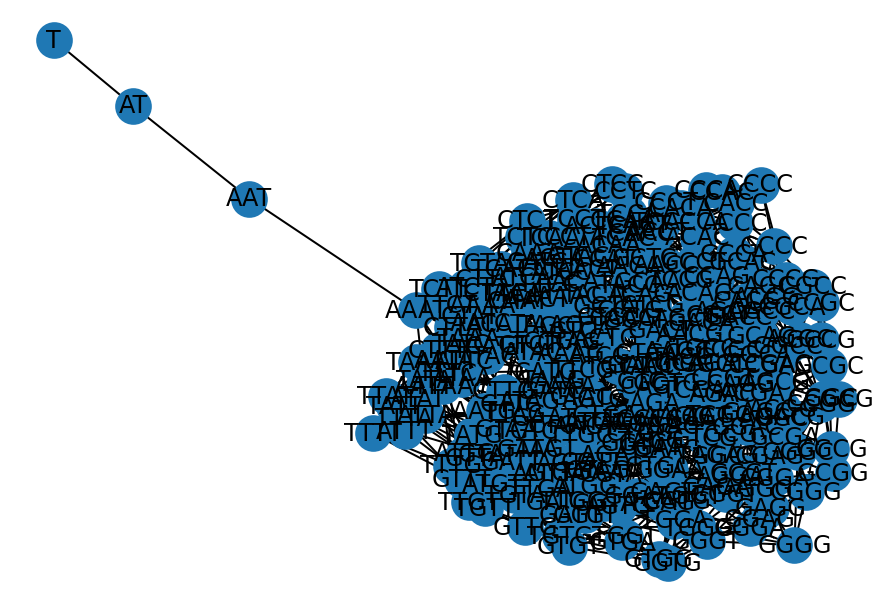

In [7]:
network = nx.Graph(Links)
#visulaizing the graph
nx.draw(network,with_labels=True)

In [8]:
#Let's see the nodes of the graph
nodes = network.nodes
nodes

NodeView(('CTAC', 'TACT', 'ACTC', 'CTCG', 'TCGG', 'CGGG', 'GGGA', 'GGAG', 'GAGG', 'AGGC', 'GGCT', 'GCTG', 'CTGA', 'TGAG', 'GGCA', 'GCAG', 'CAGG', 'AGGA', 'GAGA', 'AGAA', 'GAAT', 'AATC', 'ATCA', 'TCAC', 'CACT', 'ACTT', 'CTTG', 'TTGA', 'TGAA', 'GAAC', 'AACC', 'ACCA', 'CCAG', 'AGGG', 'GAGT', 'AGTC', 'GTCA', 'TCAG', 'CAGA', 'AGAG', 'AGGT', 'GGTT', 'GTTG', 'TTGC', 'TGCA', 'CAGT', 'AGTG', 'GTGA', 'GAGC', 'AGCC', 'GCCA', 'CCAA', 'CAAG', 'AAGA', 'AGAT', 'GATC', 'ATCG', 'TCGC', 'CGCA', 'GCAC', 'CACC', 'CCAC', 'ACTG', 'CTGC', 'CTCC', 'TCCA', 'CAGC', 'GCCT', 'CCTG', 'CTGG', 'TGGC', 'GCAA', 'CAAC', 'AACA', 'ACAC', 'CACA', 'ACAG', 'AGCG', 'GCGA', 'CGAG', 'GTCT', 'TCTG', 'CTGT', 'TGTC', 'TCTC', 'CAAA', 'AAAA', 'AAAG', 'AAGG', 'GGCC', 'GCCC', 'CCCA', 'AGCA', 'GCAT', 'CATT', 'ATTT', 'TTTC', 'TTCA', 'TCAA', 'AAAC', 'AACT', 'TGTT', 'GTTT', 'TTTG', 'TTGT', 'GGTA', 'GTAA', 'TAAT', 'ATCT', 'TCTT', 'CTTA', 'TTAT', 'TATA', 'ATAC', 'TACA', 'ACAT', 'ATTC', 'AGTT', 'TTCT', 'CTTT', 'TTTT', 'TTGG', 'GCTT', 'TTAC'

### Defining a significant feature
StellarGraph is a graph algorithm that requires features for each node.

We will condsider the occurence of the letter 'A','T','C' or 'G' in the small sequence of 4 letters (the node), so the occurence is an integer between 0 and 4.

In [9]:
#this function returns the occurance of a caracter c in a string ch
def occurance (c , ch):
  occ = 0
  for i in range (len(ch)):
    if ch[i]==c:
      occ=occ+1
  return occ

In [10]:
#this function returns the features vector of a node
def compute_features (node):
  L = [occurance(c,node) for c in "ATGC"]
    
  return (L)  

In [11]:
g_feature_attr = network.copy()
for node, node_data in g_feature_attr.nodes(data=True):
    node_data["feature"] = compute_features(node)

In [12]:
G = StellarGraph.from_networkx(g_feature_attr, node_features="feature")
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 259, Edges: 1009

 Node types:
  default: [259]
    Features: float32 vector, length 4
    Edge types: default-default->default

 Edge types:
    default-default->default: [1009]
        Weights: all 1 (default)
        Features: none


In [13]:
edge_splitter_test = EdgeSplitter(G)

### Splitting the graph into train and test subgraphs

In [14]:
G_test, edge_ids_test, edge_labels_test = edge_splitter_test.train_test_split(
    p=0.1, method="global", keep_connected=True
)

** Sampled 100 positive and 100 negative edges. **


In [15]:
batch_size = 50
epochs = 100  # The number of training epochs for training the GraphSAGE model.

# train, test, validation split
train_size = 0.6
test_size = 0.2
val_size = 0.2

In [16]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_val = EdgeSplitter(G_test)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_val, edge_ids_val, edge_labels_val = edge_splitter_val.train_test_split(
    p=val_size, method="global", keep_connected=True
)

** Sampled 181 positive and 181 negative edges. **


In [17]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_train = EdgeSplitter(G_val)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train, edge_ids_train, edge_labels_train = edge_splitter_train.train_test_split(
    p=train_size, method="global", keep_connected=True
)

** Sampled 436 positive and 436 negative edges. **


In [18]:
print(G_train.info())
print(G_val.info())
print(G_test.info())

StellarGraph: Undirected multigraph
 Nodes: 259, Edges: 292

 Node types:
  default: [259]
    Features: float32 vector, length 4
    Edge types: default-default->default

 Edge types:
    default-default->default: [292]
        Weights: all 1 (default)
        Features: none
StellarGraph: Undirected multigraph
 Nodes: 259, Edges: 728

 Node types:
  default: [259]
    Features: float32 vector, length 4
    Edge types: default-default->default

 Edge types:
    default-default->default: [728]
        Weights: all 1 (default)
        Features: none
StellarGraph: Undirected multigraph
 Nodes: 259, Edges: 909

 Node types:
  default: [259]
    Features: float32 vector, length 4
    Edge types: default-default->default

 Edge types:
    default-default->default: [909]
        Weights: all 1 (default)
        Features: none


In [19]:
num_samples = [10, 5]

## Preparing the Graph as an Input for the model

In [20]:
train_gen = GraphSAGELinkGenerator(G_train, batch_size, num_samples)
val_gen = GraphSAGELinkGenerator(G_val, batch_size, num_samples)
test_gen = GraphSAGELinkGenerator(G_test, batch_size, num_samples)

In [21]:
layer_sizes = [32, 32]
graphsage = GraphSAGE(
    layer_sizes=layer_sizes, generator=train_gen, bias=True,kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)
)

In [22]:
# Build the model and expose input and output sockets of graphsage, for node pair inputs:
x_inp, x_out = graphsage.in_out_tensors()

In [23]:
logits = link_classification(
    output_dim=1, output_act="linear", edge_embedding_method="ip"
)(x_out)

prediction = keras.layers.Activation(keras.activations.sigmoid)(logits)

link_classification: using 'ip' method to combine node embeddings into edge embeddings


### Defining the learning model

Before creating our model, let's define some metrics to evaluate our model later

In [24]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [25]:
#Let's create our model
model = keras.Model(inputs=x_inp, outputs=prediction)

model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-3),
    loss=keras.losses.binary_crossentropy,
    metrics=[keras.metrics.binary_accuracy,
             keras.metrics.MeanSquaredError(name='my_mse'),
             keras.metrics.AUC(name='my_auc'),
             f1_m,precision_m,recall_m,
             keras.metrics.FalseNegatives(
             thresholds=None, name=None, dtype=None),
             ],
)

In [26]:
train_flow = train_gen.flow(edge_ids_train, edge_labels_train, shuffle=True)
val_flow = val_gen.flow(edge_ids_val, edge_labels_val)
test_flow = test_gen.flow(edge_ids_test, edge_labels_test)

#### Evaluate the untrained

In [27]:
init_train_metrics = model.evaluate(train_flow)
init_val_metrics = model.evaluate(val_flow)
init_test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nValidation Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_val_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

4/4 [==============================] - 0s 49ms/step - loss: 0.7580 - binary_accuracy: 0.5000 - my_mse: 0.2768 - my_auc: 0.7736 - f1_m: 0.5000 - precision_m: 0.5000 - recall_m: 0.5000 - false_negatives: 0.0000e+00

Train Set Metrics of the initial (untrained) model:
	loss: 0.7433
	binary_accuracy: 0.5000
	my_mse: 0.2704
	my_auc: 0.7828
	f1_m: 0.6650
	precision_m: 0.5014
	recall_m: 1.0000
	false_negatives: 0.0000

Validation Set Metrics of the initial (untrained) model:
	loss: 0.7543
	binary_accuracy: 0.5000
	my_mse: 0.2753
	my_auc: 0.8034
	f1_m: 0.4707
	precision_m: 0.4525
	recall_m: 0.5000
	false_negatives: 0.0000

Test Set Metrics of the initial (untrained) model:
	loss: 0.7580
	binary_accuracy: 0.5000
	my_mse: 0.2768
	my_auc: 0.7736
	f1_m: 0.5000
	precision_m: 0.5000
	recall_m: 0.5000
	false_negatives: 0.0000


#### Train the model

In [28]:
history = model.fit(
    train_flow, epochs=epochs, validation_data=val_flow, verbose=0, shuffle=True,
)

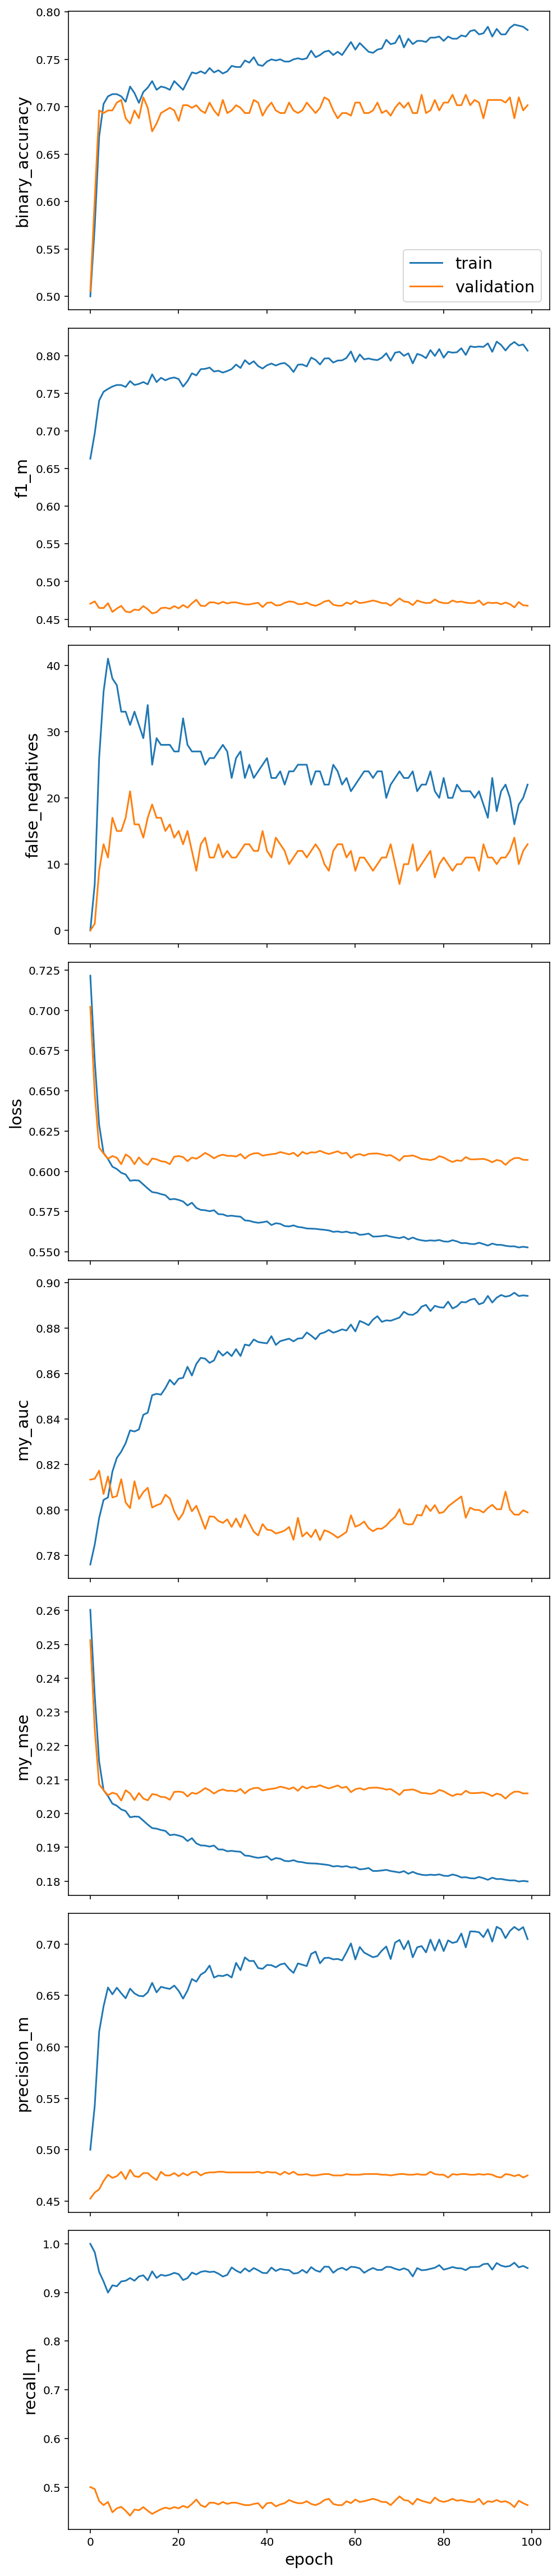

In [29]:
sg.utils.plot_history(history)

#### Evaluate the trained model

In [30]:
train_metrics = model.evaluate(train_flow)
val_metrics = model.evaluate(val_flow)
test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nValidation Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, val_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

4/4 [==============================] - 0s 52ms/step - loss: 0.6054 - binary_accuracy: 0.7350 - my_mse: 0.2049 - my_auc: 0.8033 - f1_m: 0.4872 - precision_m: 0.5000 - recall_m: 0.4750 - false_negatives: 5.0000

Train Set Metrics of the trained model:
	loss: 0.5524
	binary_accuracy: 0.7810
	my_mse: 0.1797
	my_auc: 0.8949
	f1_m: 0.8071
	precision_m: 0.7074
	recall_m: 0.9491
	false_negatives: 22.0000

Validation Set Metrics of the trained model:
	loss: 0.6069
	binary_accuracy: 0.6989
	my_mse: 0.2058
	my_auc: 0.7996
	f1_m: 0.4678
	precision_m: 0.4750
	recall_m: 0.4629
	false_negatives: 13.0000

Test Set Metrics of the trained model:
	loss: 0.6054
	binary_accuracy: 0.7350
	my_mse: 0.2049
	my_auc: 0.8033
	f1_m: 0.4872
	precision_m: 0.5000
	recall_m: 0.4750
	false_negatives: 5.0000


**Generalizability**: Let's see how well the algorithm performs on the data if other species, we will take Ferroglobus placidus as example.

In [31]:
dna_sequence_test ="TTTGACTGATTTAAGCAAAACATTAAAGTATTTTTCACATTCATTTAAGCTGTGGTAATCACCTACAGCAGAAACGTGTTCCTACCTTTAACGAGATCCTGCAGAAATCGCTGCTACTACTGCGGATTTAGGAGAGAGAACGACGGCTTAATGAGCCTCGACTCGATAATCTCTTTGCTAAGGAAAGCGAAAAACGCAACCGAAGCCTTGCTCACGTTTGGAGAACAACCAGAGTTCAGCGAGAAGGTAAAAAAAGATCTTAAGGCTTTAGGATTCAGCAGTTTTTCGGATTACGTTAAGTCCGTCTGCGAAATTGCAATTAAGGAGGGCTTTTTACCCCACACGAATCCGGGAGTCGTTGATACTGACTTTTTGAAGAAGGTTAAAGATTTCAACGCTAGCATGGGGCTTATGCTTGAGCAAGCGGTTGAACTGGAGTGTCACAAAGAGAGTCCCGGAAAGAAGCCGGAAGAAAGAATAAAATTCATAAAAAAAGCTGGAAAGCTGAAAATTCCTTTCACCACCGGAATTTTAGTGGGGATAGGTGAAAAGTTCGAAGACAGAATTTACTCCCTCGAAGTTATAGCAGATTTACACGACAACTACGGACACATTCAGGAGGTGATAATCCAGAATTTTTCACCGAAGAAGGGAACAAAAATGGAAAACTTTAAACCCCCTTCTACTTCCGAAATGCTTGAAACTGTCAAAGTAGCCAGAAAGATTATTCAGAAGGATGTAGCGATCCAAGTTCCTCCGAACTTGGTGAAGGAAGTTGAGGTGTTCGTGAAAGCCGGAGCTAACGATCTTGGAGGAATTTCTGACGTAACTCCAGACTTCATAAATCCCGAACATCCATGGCCGAAGGTTGAGGAGATATCCGAGAGGTTGAAAGGGTACGAATTAAAGGAGAGGTTGCCAATCTATCCAAAATTCGTGGTGGAAGGTTGGTACAGCGAAAAAATCGCTCCGCTTATTGAAGCTTATTCAGACGAGGAGGGTTACAAATGCTGAAAGAACTTCTCGTTAAGGAACCGTTCAAAACGTTCGAAATAGCTAACAAAATCAGAGAGGAGGAAGTAGGAGACGTGGTAACTTACGTCGTTAATAGGAACATAAACTTCACGGACATCTGCATTAACTCCTGCAAATTCTGCTCATATCGGAACAGAAGGAAGTTCGTTTTGTCAACCGACGAGATAAAGAAGAAGGTTGAAGAAGCCGTAAATTACGGCTGCACGGAAGTTTGCATTCAAGGAGGACTTTATCCTAATGCTGATGTGGAATTTTACAAATCTATTTTAAGAGCGGTGAGGGAAGTTTCGAAGGACATTCACATTCACGCATTCTCTCCAATGGAAATCGTGCACGCGGCAAGAAACTCTGGATGCGATGTTGAGGATGTTTTGAGAGAGCTTAAAAAAGCGGGATTGAATTCTATGCCGGGAACAGCTGCTGAAATTCTTGACGACGAAATAAGAAGAATAATCTGTCCGGATAAGCTTTCGGTGGAGGAATGGGTCGACGTTATTAAGACCGCCCATTACTTGGGAATTCCGACGACAGCAACCATAATGTACGGGCACATCGAAAGCTGGGAGCACAGAATAAAGCATCTTATGATCATAAGGGAAATTCAGGAGGAAACTTCCGGATTCACCGAATTCATTCCCCTCCCGTTCATGAACAAAAACAACGAGCTCGGGAAAATAGCAAGGCAATCCTCCGGTTTCGAAGACCTGTTGATGATTTCAATCGCGAGAATAATTCTCCATCCGGTTATCCCGAACATTCAGGCTTCGTGGGTTAAGCTTGGAATATTGCTCAGGCAGCTTTGAATTTCGGAGCAAACGACCTCGGAGGAACATTGATGGAAGAGAACATTTCGAGGCTTGCTGGCTCCACTTCCGGAGAGTTTCTTCCGAAAGAGGAAATGGAAAGATTAATACTGAACGCCGGCAGAATCCCGGCTGAGAGAGATACGCTTTACAGAATAATCAGAGTTAGAGAAAATGTCTGAAATATCACTTTACAGCGTTTTCGCAACGGAGCGAGCGAAGCGTTGAGCAGAGGAACATTCTTTCGAAGGTGAAACTTCCCCTAAAAGTCGTCGAAGTGGATAAAGATTTGTTCCCCGATAAGGCTGAGGAACTTGAGGAGATAGGAGCCTCCTTCGGCGTTCACGGCTTGCCATTAAACGTCCTCTTTTACAAAGATATACCAATTTACGCGAGCGGATTTTTGAGCGAGAAAGACGTTTTAAAGTTAATTGAGGTAACGAAATCGCTCTTAAAAGCGGACGAAAGAAAAGTCTTAGAGGAAGGAAGGAAAGTAATTGAGAAAGTCGAAAACAGAAAAAAGGGTAAAGAGGGTTTAGCTGGATTAGAGCTTCTTTAATAGTGGGAGCAATTCTTTTCGGGATTATGCTGATGAGGCTTGAGGAAGTTGAAAGCGATTTCAAAGTTGCTGGAATACTCTATTTCCTCGGAATGATACTGAGCTTTTTCACAGGAATTATTGGGGTGCTGATCGGAATAGCAACTACAGCTCTAATTTACATCAGCGCAAAAAGCGCTTTAAAGAGGATATCCGCTGCTTGAAGAGAAAATGTTTTATCCAATCCCGTATTACTTATATTCGACCCCAGCGGGGAGGGGTGTGGAGAGAGCTAAGCTTTCGATGAAGCTCCCTGCAAGGCTGGGGTTACACCATGCCGATAGGTCCCCTGGTGAGAGAGCCCTGGCTTTCGATGACCCTGGGGCAACCCGGGCATGGGACAAAGCCCCGAGAGGTCAGCCGTTTGAGAGAGCGCAGCTTTCGATGATATACGGCGTTACACTCGGGGCACAGGAATTAGAAAACCTTTTTGAGTAAATCTTCGAACTCCTCTCTTCTGATAACTCTTCCGTGCCCCGGATAGAGTTTCTCAAACTCAAATTTCAAAACCTTCCTCAGGCTCCTTCTGTATTCTTCGTCGTTCCAGTTGAAGTTTTTCGAGGACAACGTTGGATTGTCACTAAAGACTTTACATCTAACGAGATCTCCGCAAATAAGCGAGTCACCGACGAGAATGGAAATGCTTCCTTCAGTGTGTCCGGGAGTGTGGATTATTTCGAGATCTTTTAACTCCTCTACGCTTTCAACCTCCTCAAGATACTTTGGCTTCTTTATGCTTTCGTAAAACCTCGCAAAAGACCCTATCAAGCCCTTGTATTCGTGTTTCTTAATTCCTTTAAGATATTCGAACTCTTTCGGATGTGCGTATACCTTGCTCTTCAAAATTTTCGAAAGAGCGCGAGCTGAGCCCATGTGATCGAAGTGGGAGTGCGTGAGAATAATTCCTTCGCATTCCTTAACAGCTTCGGCAATTCTCCTTTCATTCCCCGGTAATCCGGTATCTACGACGCCATCAACTACTACGAGGTAAACGTTACAGCCTTTCGCCTTTATCAGTTCCACCATGTTACGAGATCTTTTGAATGTATTTATTAACATTGAGGGGAAATTAGGAATATGTACCGCTTTGTGGAGCATACTGCAGACATAGCTTTTGAAGTTGAAGCTGAAAGCCTCGAAGAGCTTTTTATAGATGCTGCAAACGCCTTTTACGAAGCTTTTTGTAACAGAGACCTTGTCAAAGAGGAGAAGAGAGAAGATTGGAGCTCGAGGAAGAAGACGTAGAGCATCTCCTTTACTCGTGGCTGAACGAGATTCTCTTTCTGTTGATGCCGAGCACTTCGCAGCGAAAAGAGTTGAAGTCAGCGTAGAGAACAACTCTCTAAAAGCGAGACTTATCGGGGGAAAAATAACTCCTGAAGCCTCAAACTCGAACCTAAAGCCATAACGATGCACAAATTCAGAGTTGAAAGGAAGGACGGAAAATATATTTCTTTATGGACAGTAGCACCTGGAGCCCCAAGACCACCGCGGTCACCCGGCCTGTTGAGACCCACGAGCTCATTCGCAATGCAGCCGATATCTCCATCATCGTTATCTACTTCGTGGTAGTGATGGCCGTCGGACTGTGGGCTATGTTTTCCACCAATCGTGGGACTGTTGGAGGCTTCTTCCTGGCAGGCCGAAGTATGGTGTGGTGGCCGATTGGAGCCTCCCTCTTTGCTAGTAACATTGGAAGTGGCCACTTTGTGGGGCTGGCCGGGACTGGGGCAGCTTCAGGCATCGCCATTGGAGGCTTTGAATGGAATGCCCTGGTTTTGGTGGTTGTGCTGGGCTGGCTGTTTGTCCCCATCTATATTAAGGCTGGGGTGGTGACAATGCCAGAGTACCTGAGGAAGCGGTTTGGAGGCCAGCGGATCCAGGTCTACCTTTCCCTTCTGTCCCTGCTGCTCTACATTTTCACCAAGATCTCGGCAGACATCTTCTCGGGGGCCATATTCATCAATCTGGCCTTAGGCCTGAATCTGTATTTAGCCATCTTTCTCTTATTGGCAATCACTGCCCTTTACACAATTACAGGGGGCCTGGCGGCGGTGATTTACACGGACACCTTGCAGACGGTGATCATGCTGGTGGGGTCTTTAATCCTGACTGGGTTTGCTTTTCACGAAGTGGGAGGCTATGACGCCTTCATGGAAAAGTACATGAAAGCCATTCCAACCATAGTGTCTGATGGCAACACCACCTTTCAGGAAAAATGCTACACTCCAAGGGCCGACTCCTTCCACATCTTCCGAGATCCCCTCACGGGAGACCTCCCATGGCCTGGGTTCATCTTTGGGATGTCCATCCTTACCTTGTGGTACTGGTGCACAGATCAGGTCATTGTGCAGCGCTGCCTCTCAGCCAAGAATATGTCTCACGTGAAGGGTGGCTGCATCCTGTGTGGGTATCTAAAGCTGATGCCCATGTTCATCATGGTGATGCCAGGAATGATCAGCCGCATTCTGTACACAGAAAAAATTGCCTGTGTCGTCCCTTCAGAATGTGAGAAATATTGCGGTACCAAGGTTGGCTGTACCAACATCGCCTATCCAACCTTAGTGGTGGAGCTCATGCCCAATGGACTGCGAGGCCTGATGCTATCAGTCATGCTGGCCTCCCTCATGAGCTCCCTGACCTCCATCTTCAACAGCGCCAGCACCCTCTTCACCATGGACATCTACGCCAAGGTCCGCAAGAGAGCATCTGAGAAAGAGCTCATGATTGCCGGAAGGTTGTTTATCCTGGTGCTGATTGGCATCAGCATCGCCTGGGTGCCCATTGTGCAGTCAGCACAAAGTGGGCAACTCTTCGATTACATCCAGTCCATCACCAGTTACTTGGGACCACCCATTGCGGCTGTCTTCCTGCTTGCTATTTTCTGGAAGAGAGTCAATGAGCCAGGAGCCTTTTGGGGACTGATCCTAGGACTTCTGATTGGGATTTCACGTATGATTACTGAGTTTGCTTATGGAACCGGGAGCTGCATGGAGCCCAGCAACTGTCCCACGATTATCTGTGGGGTGCACTACTTGTACTTTGCCATTATCCTCTTCGCCATTTCTTTCATCACCATCGTGGTCATCTCCCTCCTCACCAAACCCATTCCGGATGTGCATCTCTACCGTCTGTGTTGGAGCCTGCGCAACAGCAAAGAGGAGCGTATTGACCTGGATGCGGAAGAGGAGAACATCCAAGAAGGCCCTAAGGAGACCATTGAAATAGAAACACAAGTTCCTGAGAAGAAAAAAGGAATCTTCAGGAGAGCCTATGACCTATTTTGTGGGCTAGAGCAGCACGGTGCACCCAAGATGACTGAGGAAGAGGAGAAAGCCATGAAGATGAAGATGACGGACACCTCTGAGAAGCCTTTGTGGAGGACAGTGTTGAACGTCAATGGCATCATCCTGGTGACCGTGGCTGTCTTTTGCCATGCATATTTTGCCTGAATGCTGCCGCAGCAAGTCGGCTTCGTGTGCGCGGTGCTGGCCCTGGTGTGCTGTGCGTCCGGCCTCTTCGGCAGCTTGGGGCACAAAACAGCTTCTGCTAGCAAACGTGTCCTGCCAGACACATGGAGAAATAGAAAGTTGATGGCCCCAGTGAATGGGACACAGACAGCCAAGAACTGCACAGATCCTGCGATTCACGAGTTCCCCACAGATCTGTTCTCCAATAAGGAGCGACAGCACGGAGCCGTCCTGCTGCACATCCTTGGTGCTCTGTATATGTTCTATGCCTTGGCCATAGTGTGCGATGACTTCTTTGTTCCGTCTCTAGAGAAGATCTGTGAGAGACTCCATCTGAGCGAAGATGTGGCTGGAGCCACCTTCATGGCTGCAGGAAGCTCAACGCCAGAGCTGTTTGCGTCTGTTATTGGGGTGTTCATCACCCATGGGGACGTCGGGGTGGGCACCATCGTGGGCTCTGCTGTGTTCAACATCCTGTGCATAATTGGAGTGTGCGGACTGTTTGCTGGCCAGGTGGTCCGTCTGACGTGGTGGGCCGTGTGCCGAGACTCCGTGTACTACACCATCTCTGTCATCGTGCTCATCGTGTTCATATATGATGAACAAATTGTGTGGTGGGAAGGCCTGGTGCTCATCATCTTGTATGTGTTTTATATTCTGATCATGAAGTACAATGTGAAGATGCAAGCCTTTTTCACAGTCAAACAAAAGAGCATTGCAAACGGTAACCCGGTCAACAGTGAGCTGGAGGCTGGTAATGATTTCTATGACGGTAGCTATGATGACCCTTCCGTGCCATTGCTGGGGCAAGTGAAGGAGAAGCCACAGTATGGCAAGAACCCCGTGGTGATGGTGGACGAGATTATGAGCTCCAGCCCTCCCAAGTTCACCTTCCCTGAAGCAGGCTTACGAATCATGATCACCAATAAGTTTGGACCCAGGACCCGACTACGGATGGCCAGCAGGATCATCATTAATGAGCGGCAGAGACTGATCAACTCGGCCGTGAGCAGTAAGCCGCTTCAAAACGGGAGGCACGAGAACATTGAGAACGGGAATGTTCCTGTGGAAAACCCCGAAGACCCTCAGCAGAATCAGGAGCAGCAGCCGCCGCCACAGCCACCACCGCCAGAGCCAGAGCCGGTGGAGGCTGACTTCCTGTCCCCCTTCTCCGTGCCGGAGGCCAGAGGGGACAAGGTCAAGTGGGTGTTCACCTGGCCCCTCATCTTCCTCCTGTGCGTCACCATTCCCAACTGCAGCAAGCCCCGCTGGGAGAAGTTCTTCATGGTCACCTTCATCACCGCCACGCTGTGGATCGCCTCCTACATCATGGTGTGGCTGGTGACTATTATCGGATACACACTTGGGATCCCGGATGTCATCATGGGCATTACTTTCCTGGCAGCAGGGACAAGTGTTCCAGACTGCATGGCCAGCCTAATTGTGGCGAGACAAGGCCTTGGGGACATGGCAGTCTCCAACACCATAGGAAGCAACGTGTTTGACATCCTGGTAGGACTTGGTGTACCGTGGGGCCTGCAGACCATGGTTGTTAATTATGGATCAACAGTGAAGATCAACAGCCGGGGGCTGGTCTATTCCGTGGTCCTGTTGCTGGGCTCTGTCGCTCTCACCGTCCTCGGCATCCACCTAAACAAGTGGCGACTGGACCGGAAGCTGGGTGTCTACGTGCTGGTTCTCTACGCCATCTTCTTGTGCTTCTCCATAATGATAGAGTTTAACGTCTTTACCTTCGTCAACTTGCCGATGTGCCGGGAAGACGATTAGATGGGTGTCAGGCAACAGTTGGCCTTGCTGCTGCTGCTGCTGCTCCTGCTCTGGGGCCTGGGGCAGCCAGTGTGGCCAGTCGCTGTGGCCTTGACCCTGCGCTGGCTCCTGGGGGATCCCACATGTTGCGTGCTACTTGGGCTGGCCATGTTAGCACGGCCCTGGCTCGGCCCCTGGGTGCCCCATGGGCTGAGCCTGGCAGCTGCGGCCCTGGCACTAACCCTCCTGCCAGCACGGCTGCCCCCAGGACTACGCTGGCTGCCGGCTGATGTGATCTTCTTGGCCAAGATCCTCCACCTGGGCCTGAAGATCAGGGGATGCTTGAGCCGGCAGCCGCCTGACACCTTTGTAGATGCCTTCGAGCGGCGAGCACGAGCGCAGCCTGGCAGGGCACTCTTGGTGTGGACGGGGCCTGGGGCCGGCTCAGTCACCTTTGGTGAGCTGGATGCCCGGGCCTGCCAGGCGGCATGGGCCCTGAAGGCTGAGCTGGGTGACCCTGCGAGCCTGTGTGCCGGGGAGCCTACTGCCCTCCTTGTGCTGGCTTCCCAGGCCGTTCCAGCCCTGTGTATGTGGCTGGGGCTGGCCAAGCTGGGCTGCCCAACAGCCTGGATCAACCCGCATGGCCGGGGGATGCCCCTGGCGCACTCTGTGCTGAGCTCTGGGGCCCGGGTGCTGGTGGTGGACCCAGACCTCCGGGAGAGCCTGGAGGAGATCCTTCCCAAGCTGCAGGCTGAGAACATCCGCTGCTTCTACCTCAGCCATACCTCCCCTACACCAGGGGTGGGGGCTCTGGGGGCTGCATGGTGGCGAGCGCGCGAGTGCAGAAGCTGGTGCGGCGCTACAAGCTGGCGATTGCCACGGCGCTGGCCATCCTGCTGCTGCAGGGCCTGGTAGTGTGGAGCTTCAGCGGCCTGGAGGAGGACGAGGCGGGCGAGAAAGGAAGGCAGAGGAAGCCACGGCCACTGGACCCTGGCGAAGGTTCCAAGGACACAGACAGTTCAGCAGGGCGACGGGGCAGCACAGGCAGAAGGCATGGGCGCTGGCGGGGCCGTGCTGAGAGCCCAGGAGTGCCCGTGGCCAAGGTGGTACGGGCAGTAACCAGCCGGCAGAGAGCCAGCCGGCGGGTCCCACCTGCCCCACCTCCGGAAGCCCCAGGCCGCCAGAACCTGAGTGGGGCAGCAGCTGGGGAGGCGCTGGTAGGGGCAGCTGGCTTCCCACCACACGGAGATACAGGGAGCGTGGAGGGCGCCCCCCAGCCCACGGACAATGGCTTCACCCCCAAGTGCGAGATCGTGGGCAAGGACGCACTGTCTGCACTGGCCCGGGCCAGCACCAAGCAGTGCCAGCAGGAGATCGCCAATGTGGTGTGCCTGCACCAGGCTGGGAGCCTCATGCCCAAGGCTGTGCCCCGGCACTGTCAGCTGACTGGGAAGATGAGCCCCGGCATCCAGTGGGATGAGAGCCAAGCCCAGCAGCCCATGGATGGCCCCCCGGTGCGAATCGCCTACATGCTGGTGGTTCACGGCCGCGCCATCCGCCAGCTGAAGCGTCTCCTCAAGGCCGTTTATCACGAGCAGCACTTCTTTTACATCCATGTGGACAAGCGTTCCGACTACCTGCACCGGGAGGTGGTGGAGCTGGCCCAGGGCTATGATAACGTGCGGGTGACGCCCTGGCGCATGGTTACCATCTGGGGCGGGGCCAGCCTCCTGACGATGTACCTGCGGAGCATGCGGGACCTGCTAGAGGTGCCTGGCTGGGCCTGGGACTTCTTCATCAACCTCAGTGCCACTGACTATCCAACCAGGACCAATGAGGAGCTGTTCCTATCCAAGAACCGGGACAAGAATTTCCTCAAGTCACATGGCCGGGACAACTCCAGGTTCATCAAGAAACAGGGCCTGGACCGGCTCTTCCATGAGTGCGACTCACACATGTGGCGCCTGGGCGAGCGGCAGATCCCAGCAGGCATTGTGGTGGATGGCGGTTCTGACTGGTTCGTGCTGACACGCAGCTTTGTGGAGTATGTGGTGTACACAGATGACCCGCTTGTGGCCCAGCTGCGCCAGTTCTACACATACACACTGCTCCCAGCCGAGTCCTTCTTCCACACGGTGCTGGAGAACAGCCTGGCCTGTGAGACCCTCGTGGACAACAACCTGCGGGTCACCAACTGGAACCGCAAGCTGGGCTGCAAGTGCCAGTACAAGCACATTGTGGACTGGTGTGGCTGCTCCCCCAACGACTTCAAGCCACAGGACTTCCTCCGGCTGCAGCAAGTCTCCAGACCCACCTTCTTCGCCCGGAAGTTCGAGTCGACTGTGAACCAGGAGGTGCTGGAAATCCTGGACTTCCACCTGTACGGCAGCTACCCCCCCGGCACGCCAGCCCTCAAGGCCTACTGGGAGAACACCTACGACGCGGCTGATGGCCCCAGTGGGCTCAGTGATGTCATGCTCACTGCTTACACAGCCTTCGCCCGCCTCAGCCTGCACCATGCCGCCACTGCTGCACCCCCAATGGGCACCCCACTCTGCAGGTTTGAGCCCAGGGGCTTGCCGTCCAGCGTGCACCTGTATTTCTATGACGACCATTTCCAGGGCTACCTGGTGACGCAGGCGGTGCAGCCCTCAGCCCAGGGGCCGGCAGAGACGCTTGAGATGTGGCTGATGCCCCAAGGGTCGCTGAAGCTGTTGGGGCGCAGTGACCAGGCCAGCCGGCTCCAGAGTCTGGAGGTTGGCACTGATTGGGACCCCAAAGAGCGTCTTTTCCGGAACTTTGGGGGGTTACTGGGGCCGCTGGACGAGCCTGTGGCCGTGCAGCGCTGGGCCCGGGGCCCCAACCTAGCCACAGTGGTCTGGATCGACCCAACCTATGTGGTGGCCACATCTTATGACATCACAGTAGATACGGAGACTGAGGTCACGCAATACAAGCCCCCACTGAGCCGGCCCCTGCGGCCAGGGCCCTGGACTGTTCGACTCCTTCAGTTCTGGGAACCGCTGGGTGAGACCCGCTTCCTTGTGCTGCCCTTGACCTTCAACCGCAAACTACCTCTCAGGAAAGATGATGCCAGCTGGCTGCACGCAGGGCCACAACGAGTACATGGAGCAGAGTTTCCAGGGCCTGAGTAGCATCCTGAACCTGCCTCAGCCGGAGCTCGCGGAGGAGGCTGCCCAGCGGCACACACAGCTCACAGGCCCTGCGCTCGAGGCCTGGACAGACAGGGAACTGAGCAGCTTCTGGTCCGTGGCTGGACTGTGTGCCATAGGCCCCTCTCCCTGCCCCTCCCTGGAGCCCTGCAGACTGACCAGCTGGAGCTCTCTGTCCCCCGACCCCAAATCAGAGCTGGGGCCTGTCAAAGCAGACGGGCGACTCAGGTAGATGGCTTTGCCTCTGAGGCCCCTGACCCGGGGCTTGGCCAGCGCTGCCAAAGGAGGCCACGGAGGAGCAGGAGCTCGTACCTGGCGTCTGCTGACCTTCGTGCTGGCGCTGCCCAGCGTGGCCCTCTGCACCTTCAACTCCTATCTCCACTCGGGCCACCGCCCGCGCCCCGAGTTCCGTCCCTACCAACACCTCCGCATCCGCACCAAGCCCTACCCCTGGGGGGACGGCAACCACACTCTGTTCCACAATAGCCACGTGAACCCTCTGCCCACGGGCTACGAACACCCCTGAATGGCATCTACGGAAGGTGCCAACAATATGCCCAAGCAGGTGGAAGTGCGAATGCACGACAGTCATCTTGGCTCAGAGGAACCCAAGCACCGGCACCTGGGCCTGCGCCTGTGTGACAAGCTGGGGAAGAATCTGCTGCTCACCCTGACGGTGTTTGGTGTCATCCTGGGAGCAGTGTGTGGAGGGCTTCTTCGCTTGGCATCTCCCATCCACCCTGATGTGGTTATGTTAATAGCCTTCCCAGGGGATATACTCATGAGGATGCTAAAAATGCTCATTCTCCCTCTAATCATCTCCAGCTTAATCACAGGGTTGTCAGGCCTGGATGCTAAGGCTAGTGGCCGCTTGGGCACGAGAGCCATGGTGTATTACATGTCCACGACCATCATTGCTGCAGTACTGGGGGTCATTCTGGTCTTGGCTATCCATCCAGGCAATCCCAAGCTCAAGAAGCAGCTGGGGCCTGGGAAGAAGAATGATGAAGTGTCCAGCCTGGATGCCTTCCTGGACCTTATTCGAAATCTCTTCCCTGAAAACCTTGTCCAAGCCTGCTTTCAACAGATTCAAACAGTGACGAAGAAAGTCCTGGTTGCACCACCGCCGGACGAGGAGGCCAACGCAACCAGCGCTGTTGTCTCTCATGCCGCGCCCCCGCCTGCTGGCCGCGCTGTGCGGCGCGCTGCTCTGCGCCCCCAGCCTCCTCGTCGCCCTGGATATCTGTTCCAAAAACCCCTGCCACAACGGTGGTTTATGCGAGGAGATTTCCCAAGAAGTGCGAGGAGATGTCTTCCCCTCGTACACCTGCACGTGCCTTAAGGGCTACGCGGGCAACCACTGTGAGACGAAATGTGTCGAGCCACTGGGCCTGGAGAATGGGAACATTGCCAACTCACAGATCGCCGCCTCGTCTGTGCGTGTGACCTTCTTGGGTTTGCAGCATTGGGTCCCGGAGCTGGCCCGCCTGAACCGCGCAGGCATGGTCAATGCCTGGACACCCAGCAGCAATGACGATAACCCCTGGATCCAGGTGAACCTGCTGCGGAGGATGTGGGTAACAGGTGTGGTGACGCAGGGTGCCAGCCGCTTGGCCAGTCATGAGTACCTGAAGGCCTTCAAGGTGGCCTACAGCCTTAATGGACACGAATTCGATTTCATCCATGATGTTAATAAAAAACACAAGGAGTTTGTGGGTAACTGGAACAAAAACGCGGTGCATGTCAACCTGTTTGAGACCCCTGTGGAGGCTCAGTACGTGAGATTGTACCCCACGAGCTGCCACACGGCCTGCACTCTGCGCTTTGAGCTACTGGGCTGTGAGCTGAACGGATGCGCCAATCCCCTGGGCCTGAAGAATAACAGCATCCCTGACAAGCAGATCACGGCCTCCAGCAGCTACAAGACCTGGGGCTTGCATCTCTTCAGCTGGAACCCCTCCTATGCACGGCTGGACAAGCAGGGCAACTTCAACGCCTGGGTTGCGGGGAGCTACGGTAACGATCAGTGGCTGCAGGTGGACCTGGGCTCCTCGAAGGAGGTGACAGGCATCATCACCCAGGGGGCCCGTAACTTTGGCTCTGTCCAGTTTGTGGCATCCTACAAGGTTGCCTACAGTAATGACAGTGCGAACTGGACTGAGTACCAGGACCCCAGGACTGGCAGCAGTAAGATCTTCCCTGGCAACTGGGACAACCACTCCCACAAGAAGAACTTGTTTGAGACGCCCATCCTGGCTCGCTATGTGCGCATCCTGCCTGTAGCCTGGCACAACCGCATCGCCCTGCGCCTGGAGCTGCTGGGCTGTTAG"
print (len(dna_sequence_test))

13176


Create the graph of the new DNA

In [32]:
dna_list_test = []
for i in range(0,len(dna_sequence_test)-len(dna_sequence_test)%4,1):
    dna_list_test.append(dna_sequence_test[i:i+4])
    
Links_test = []
for i in range(len(dna_list_test)-1):
    Links_test.append((dna_list_test[dna_list_test.index(dna_list_test[i])],dna_list_test[dna_list_test.index(dna_list_test[i+1])]))

$$

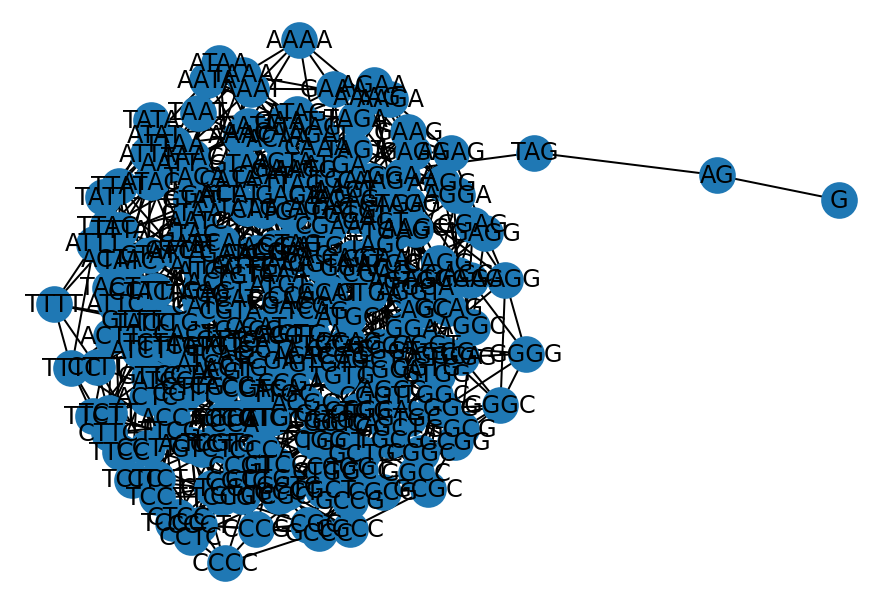

In [33]:
network_test = nx.Graph(Links_test)
nx.draw(network_test,with_labels=True)

In [34]:
g_feature_attr_test = network_test.copy()
for node, node_data in g_feature_attr_test.nodes(data=True):
    node_data["feature"] = compute_features(node)

In [35]:
Gr_test = StellarGraph.from_networkx(g_feature_attr_test, node_features="feature")
print(Gr_test.info())

StellarGraph: Undirected multigraph
 Nodes: 259, Edges: 1015

 Node types:
  default: [259]
    Features: float32 vector, length 4
    Edge types: default-default->default

 Edge types:
    default-default->default: [1015]
        Weights: all 1 (default)
        Features: none


In [36]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_train_test = EdgeSplitter(Gr_test)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train_test, edge_ids_train_test, edge_labels_train_test = edge_splitter_train_test.train_test_split(
    p=train_size, method="global", keep_connected=True
)

** Sampled 609 positive and 609 negative edges. **


In [37]:
train_gen_test = GraphSAGELinkGenerator(G_train_test, batch_size, num_samples)
train_flow_test = train_gen_test.flow(edge_ids_train_test, edge_labels_train_test, shuffle=True)
init_train_metrics_test = model.predict(train_flow_test)

In [38]:
train_metrics_test = model.evaluate(train_flow_test)

print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics_test):
    print("\t{}: {:0.4f}".format(name, val))

25/25 [==============================] - 1s 53ms/step - loss: 0.5807 - binary_accuracy: 0.7323 - my_mse: 0.1934 - my_auc: 0.8514 - f1_m: 0.7782 - precision_m: 0.6711 - recall_m: 0.9410 - false_negatives: 38.0000

Train Set Metrics of the trained model:
	loss: 0.5807
	binary_accuracy: 0.7323
	my_mse: 0.1934
	my_auc: 0.8514
	f1_m: 0.7782
	precision_m: 0.6711
	recall_m: 0.9410
	false_negatives: 38.0000


Let's train our data on a sequence of the **Chimpnazee DNA**

In [39]:
chimp_dna = "TCCAGCCTTGGCACCTCAAGGCCTTGCCCGGGATGCCCCCGCCTGAACCCCTGGAAGCTGTTTCCACCTGCCAGCGGCACCCGACCAAGCCTAGCTGCAGACTCCAAAGGGCTCAGGTTTTGGCACAAGACTGTCCAGGGCTGGGCTGGGGCTGTTCTGCCCGAGGTGGACAAGCTGTGTCACAGAGAGACTGAGCAGCTCCAGGGAGACATCGCCCCCGTTCCCCAGCAGCAGCAGCAGCCACGTCCCTTGGCCAGCACGAGGCCAAGCCAGTGAGAGCTCAGAGACAGCATGGGTGGAAGGGCAACCCGTCGGCCTCCAGCTTCCAGATTCCCACACCTCCCCATGCCCTCACCATGTTCTTTTCGTTTCCGGCCCATTTCCGGAAGATCTGCAGGGACTGCCCAGCGTGCAGCATTCCTGGCGTGGCAAACACAACCTACAGGACACACAGGGCCAGGTGGGGGGTCAGGGCAGCAGATGCCCCCCACCCCCACTGCAGGCCCAAGCCCAGACACCTGCGGAAGACAGGAGACCGACGGATGTGGATGTGCTGGCCGGCCCTGCCGCAGGCCTCACCATCGGTCCTGGGTTGTCAGCAAAAGCCCGGTCGAAGGCCTTGATGTGCTTGAACTCAAACATGTTCCTCTGCACGAAAGTCTTGCGGATCTTCTGGTTGGTCCAGGGGATGAACAGCTTGTAGTAGTGGTTGGCCTTCTCGGTCAGCCCCGTGGAGAAGTAGATGGGCACCTTCAGGTTCATGCGCTCCCTGGGGACCACCGGCCCAGTCAGCACAGTGGCCACAGGGGAGAATGCTGCAGGGCAGGACTCGGCCGGGTCACCCCCCACACCCGTGTCTGCACAGCCCATGCACGGGCCAGGCTGAGTCCGGTCGCGACCACGGGAGGCCAGTGCCCTCAGCCTATGTCCCATTAAGCCCTGCAGCAGCCGGGCTCAGCGGAGAACCAGGAACCCCTACAAGAGCCGCACACAGTGGCGCTGACAGGATGTCACAGGCCTCCTGGGGTCACACAGCACACGAGCGGCCCCCAGGACAGCAGCAAGCAGGGCCAAGATGCCACCGCTACGCTGGACAGGGCTGCCCACCAACTGGACTGTGTTCAGGCCGGGCCAGGGGCTCCTTAAAGAGCCGTCCTGGCGGCACCTACCAGAAGGTCTCCAGGAGGATGCAGAGCTCCTGGGCGCGGCCCAGCGCGAACACAGGTATCAGCACCTGAGGGGGACACAAGGCAGGAGCCCTGGGCACGTGGCCCCTCGACACAGCAGGCAGCGTCCAGTGAGGGCACGGCCAGGTGCCCAAGAGCTGCGGCCTCATAGGGACCTTAGCCTCTCATCTGCTCCCAGTCCCGTCCCAGCCGCTCTCCAGAGACAGAAGGGAGCCGCATGAGAGACACGAGGGAGCCGCATGAGAGACAGGAGGGAGCCGCATGAGAGACAGAAGGGAGCCGCATGAGAGACAGAAGGGAGCCGCATGAGAGACAGAAGGGAGCTGCATGAGAGACAGAAGGAGCCTGGCCAGGGCTTCGTCCGCACCTGAGGTAGGAGGGAAAAGGGGCTCCCTAGGAAAGGGTCTCTGAGTTTTCCTCCTCAATGCTGAGCAAATCTTCCTCCCTCCCTGCCTGAAAATGCAGTACCCCCCACCCTGAGACCCTGACCCATGCCAAGGGCAGCCAAGCCTGCCAGAAAGACCAGCCCAGCATGGCCGAGGGCCCATGTCCCCACCCCTGCTGCAGCTACCTTCCCACCACGCTCCACGGTCTCGTGGACTTTCTTCAGGAAGTCTCGCTCCCGGCAGCGCTTGGAGTCACGGATGGTCGTGGCGTACGTGGACTCTGTGATGAGCAGGTTGGGGCGGCACTTGTCAATCCAGGCAGCTCTGGAACACGGGGGTGGGGGTGTGAGCCACGATGCACTGTCCCCACAGTTGCAGGGCTGGGT"
print(len(chimp_dna))

1959


In [40]:
dna_list_chimp = []
for i in range(0,len(chimp_dna)-len(chimp_dna)%4,1):
    dna_list_chimp.append(chimp_dna[i:i+4])
    
Links_chimp = []
for i in range(len(dna_list_chimp)-1):
    Links_chimp.append((dna_list_chimp[dna_list_chimp.index(dna_list_chimp[i])],dna_list_chimp[dna_list_chimp.index(dna_list_chimp[i+1])]))

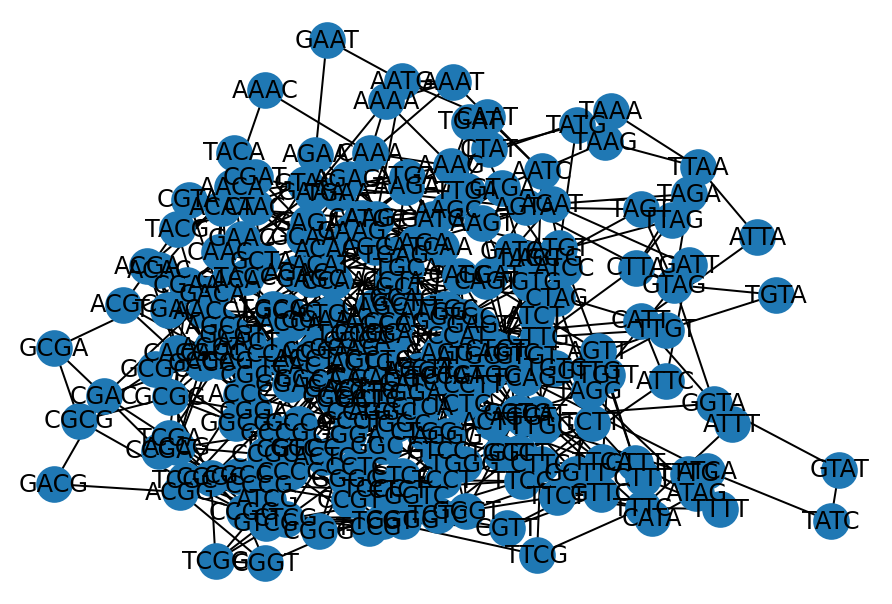

In [41]:
network_chimp = nx.Graph(Links_chimp)
nx.draw(network_chimp,with_labels=True)

In [42]:
g_feature_attr_chimp = network_chimp.copy()
for node, node_data in g_feature_attr_chimp.nodes(data=True):
    node_data["feature"] = compute_features(node)

In [43]:
Gr_chimp = StellarGraph.from_networkx(g_feature_attr_chimp, node_features="feature")
print(Gr_chimp.info())

StellarGraph: Undirected multigraph
 Nodes: 235, Edges: 652

 Node types:
  default: [235]
    Features: float32 vector, length 4
    Edge types: default-default->default

 Edge types:
    default-default->default: [652]
        Weights: all 1 (default)
        Features: none


In [44]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_train_test = EdgeSplitter(Gr_chimp)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train_chimp, edge_ids_train_chimp, edge_labels_train_chimp = edge_splitter_train_test.train_test_split(
    p=train_size, method="global", keep_connected=True)


** Sampled 391 positive and 391 negative edges. **


In [46]:
train_gen_chimp = GraphSAGELinkGenerator(G_train_chimp, batch_size, num_samples)
train_flow_chimp = train_gen_chimp.flow(edge_ids_train_chimp, edge_labels_train_chimp, shuffle=True)
init_train_metrics_chimp = model.predict(train_flow_chimp)

In [47]:
train_metrics_chimp = model.evaluate(train_flow_chimp)

print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics_chimp):
    print("\t{}: {:0.4f}".format(name, val))

16/16 [==============================] - 1s 48ms/step - loss: 0.5871 - binary_accuracy: 0.7199 - my_mse: 0.1966 - my_auc: 0.8407 - f1_m: 0.7666 - precision_m: 0.6620 - recall_m: 0.9177 - false_negatives: 33.0000

Train Set Metrics of the trained model:
	loss: 0.5871
	binary_accuracy: 0.7199
	my_mse: 0.1966
	my_auc: 0.8407
	f1_m: 0.7666
	precision_m: 0.6620
	recall_m: 0.9177
	false_negatives: 33.0000


****Conclusion****

The aim of this project was to predict links between 'small' sequences. The learning was done using a given human "long" sequence and modeling the sequence as a graph, where nodes are the small sequences and links are the associations between the nodes. Also we embedded a feature in each note which is the occurence of each letter in the node sequence. 
- We can see that GraphSage Neural Netwrok algorithm performs better than mere guessing so it's learning from the graph.
- We also see by applying the trained model to a DNA sequencing of a bacteria (so far genetically from humans) and to a chimpanzee (so close genetically), we see that the performance of the algorithm doesn't change. Thus, it is learning chemical preoperties and not able to extract biological distinctive features of different species.